In [110]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv('checkins.dat', sep='|', header=0, skipinitialspace=True, low_memory=False)
data.dropna(inplace=True)

In [3]:
data

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
12,984483,1030290.0,955969.0,32.221743,-110.926479,2012-04-21 17:58:54
13,984685,304253.0,23558.0,40.650000,-73.950000,2012-04-21 18:19:34
14,984470,720850.0,749715.0,33.448377,-112.074037,2012-04-21 17:02:47
16,984610,1639666.0,442605.0,33.414768,-111.909309,2012-04-21 18:04:58
19,984653,1647192.0,23558.0,42.358431,-71.059773,2012-04-21 18:23:22


In [4]:
subset = data[:100000]
subset

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
12,984483,1030290.0,955969.0,32.221743,-110.926479,2012-04-21 17:58:54
13,984685,304253.0,23558.0,40.650000,-73.950000,2012-04-21 18:19:34
14,984470,720850.0,749715.0,33.448377,-112.074037,2012-04-21 17:02:47
16,984610,1639666.0,442605.0,33.414768,-111.909309,2012-04-21 18:04:58
19,984653,1647192.0,23558.0,42.358431,-71.059773,2012-04-21 18:23:22


In [5]:
min(subset['created_at      '])

'2011-12-08 04:26:06'

In [6]:
import time
shift = time.mktime(time.strptime(min(subset['created_at      ']), "%Y-%m-%d %H:%M:%S"))
def to_float(x):
    return x.apply(lambda y: (time.mktime((time.strptime(y, "%Y-%m-%d %H:%M:%S"))) - shift)/1000)
def to_datetime(x):
    return x.apply(lambda y: pd.to_datetime(time.asctime(time.localtime(y*1000+shift))))

In [7]:
float_date = to_float(subset['created_at      '])

In [8]:
subset['created_at      '] = float_date

/home/igor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
float_date[:5]

2     11711.861
4     11711.857
8     11711.596
10    11711.380
11    11711.532
Name: created_at      , dtype: float64

In [28]:
to_datetime(float_date[:5])

2    2012-04-21 17:43:47
4    2012-04-21 17:43:43
8    2012-04-21 17:39:22
10   2012-04-21 17:35:46
11   2012-04-21 17:38:18
Name: created_at      , dtype: datetime64[ns]

In [29]:
subset[:5]

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,11711.861
4,984234,44652.0,5222.0,33.800745,-84.410520,11711.857
8,984291,105054.0,5222.0,45.523452,-122.676207,11711.596
10,984318,2146539.0,5222.0,40.764462,-111.904565,11711.380
11,984232,93870.0,380645.0,33.448377,-112.074037,11711.532


In [11]:
subset[:5]

,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,11711.861
4,984234,44652.0,5222.0,33.800745,-84.410520,11711.857
8,984291,105054.0,5222.0,45.523452,-122.676207,11711.596
10,984318,2146539.0,5222.0,40.764462,-111.904565,11711.380
11,984232,93870.0,380645.0,33.448377,-112.074037,11711.532


In [12]:
subset[-5:]

,id,user_id,venue_id,latitude,longitude,created_at
233789,123888,1019078.0,1105563.0,33.575000,-117.725556,263.533
233790,124366,771129.0,329847.0,37.629349,-122.400087,260.968
233794,125556,804990.0,254046.0,29.762884,-95.383061,268.094
233798,127250,526214.0,34473.0,32.802955,-96.769923,279.572
233799,127284,290973.0,280656.0,37.774929,-122.419415,273.514


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
subset.columns

Index(['id    ', 'user_id ', 'venue_id ', 'latitude      ', 'longitude     ',
       'created_at      '],
      dtype='object')

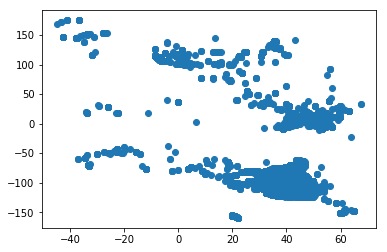

In [15]:
plt.scatter(subset['latitude      '], subset['longitude     '])

In [66]:
from sklearn.cluster import MeanShift

In [116]:
X = np.array(subset[['latitude      ', 'longitude     ']])

In [54]:
clustering = MeanShift(bandwidth=0.1, bin_seeding = True)

In [71]:
clustering.fit(X)

MeanShift(bandwidth=0.1, bin_seeding=True, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [99]:
labels = clustering.labels_
labels

array([ 5,  7, 28, ..., 23, 19,  4])

In [100]:
len(labels[labels == 5])

2445

In [73]:
clustering

MeanShift(bandwidth=0.1, bin_seeding=True, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [74]:
clustering.cluster_centers_

array([[  40.7177164 ,  -73.99183542],
       [  33.44638027, -111.90188756],
       [  33.44841049, -112.07400428],
       ...,
       [ -37.8229826 ,  145.1811902 ],
       [ -41.2924945 ,  174.7732353 ],
       [ -45.0311622 ,  168.6626435 ]])

In [75]:
clustering.cluster_centers_.shape

(3093, 2)

In [117]:
labels = clustering.labels_
n_clusters_ = len(clustering.cluster_centers_)
more_15_labels = [len(labels[labels == i]) > 15 for i in range(n_clusters_)]
cluster_centers = clustering.cluster_centers_[more_15_labels]
cluster_centers
n_clusters_ = len(cluster_centers)
X = X[labels < n_clusters_, :]
labels = labels[labels < n_clusters_]
labels_unique = np.unique(labels)
labels

array([ 5,  7, 28, ..., 23, 19,  4])

In [105]:
n_clusters_

590

In [106]:
X

array([[  38.8951118,  -77.0363658],
       [  33.800745 ,  -84.41052  ],
       [  45.5234515, -122.6762071],
       ...,
       [  29.7628844,  -95.3830615],
       [  32.802955 ,  -96.769923 ],
       [  37.7749295, -122.4194155]])

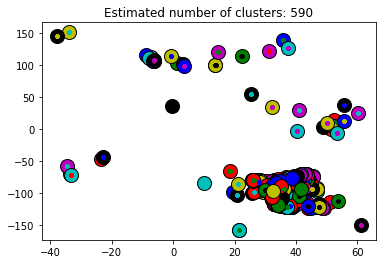

In [107]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [109]:
offices = np.array(pd.read_csv("offices.csv"))
offices

array([[ 2.58677360e+01, -8.03241160e+01],
       [ 5.15030160e+01, -7.54790000e-02],
       [ 5.23788940e+01,  4.88508400e+00],
       [ 3.93664870e+01,  1.17036146e+02],
       [-3.38684570e+01,  1.51205134e+02]])

In [123]:
X

array([[  38.8951118,  -77.0363658],
       [  33.800745 ,  -84.41052  ],
       [  45.5234515, -122.6762071],
       ...,
       [  29.7628844,  -95.3830615],
       [  32.802955 ,  -96.769923 ],
       [  37.7749295, -122.4194155]])

In [129]:
R_Earth = 6371
def distance(x, y):
    return math.sqrt((abs(x[0]-y[0])/360*R_Earth)**2 + (abs(x[1]-y[1])/360*R_Earth)**2)
def min_dist(x, y):
    return min([distance(x,y_) for y_ in y])
X = np.apply_along_axis(lambda x: np.append(x, [min_dist(x, offices)]),1, X)
X

array([[  38.8951118 ,  -77.0363658 ,  237.77706276],
       [  33.800745  ,  -84.41052   ,  157.92361889],
       [  45.5234515 , -122.6762071 ,  826.30048945],
       ...,
       [  29.7628844 ,  -95.3830615 ,  275.27232503],
       [  32.802955  ,  -96.769923  ,  315.8653401 ],
       [  37.7749295 , -122.4194155 ,  774.19946793]])

In [157]:
from operator import itemgetter
X_sorted = sorted(X, key = itemgetter(2))[:20]
X_20 = np.apply_along_axis(lambda x: x[:2], 1, X_sorted)

In [162]:
answer = X_20[0]
answer

array([ 25.8650961, -80.3244957])